En este caso usaremos un RNC

In [ ]:
pip install tensorflow-datasets

In [51]:
import tensorflow as tf
import tensorflow_datasets as tfds  

In [52]:
# Cargar el conjunto de datos Fashion MNIST con metadatos 
# Conjunto de datos de imágenes de ropa en escala de grises de 28x28 píxeles
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [7]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\gerar\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP

In [53]:
datos_entrenamiento, datos_prueba = datos['train'], datos['test']   

In [54]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\gerar\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP

In [55]:
nombre_clases = metadatos.features['label'].names

In [56]:
nombre_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [57]:
# Normalizar datos 
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255 #Aqui lo paso de 0-255 a 0-1
    return imagenes, etiquetas

# Aplicar la función de normalización a los datos de entrenamiento y prueba
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_prueba = datos_prueba.map(normalizar)

# Cachear los datos para mejorar el rendimiento
datos_entrenamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()

In [58]:
datos_entrenamiento

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [59]:
datos_prueba

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

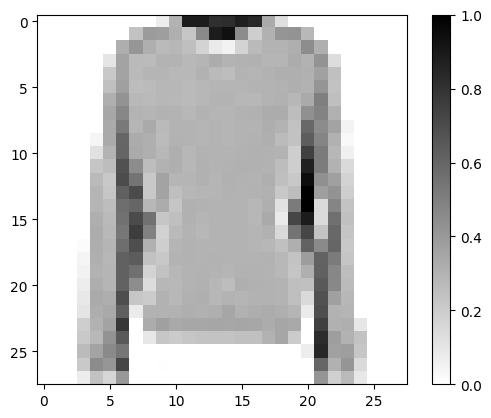

In [60]:
# Mostrar un ejemplo de imagen y su etiqueta
for imagne, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagne.numpy().reshape((28,28))
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

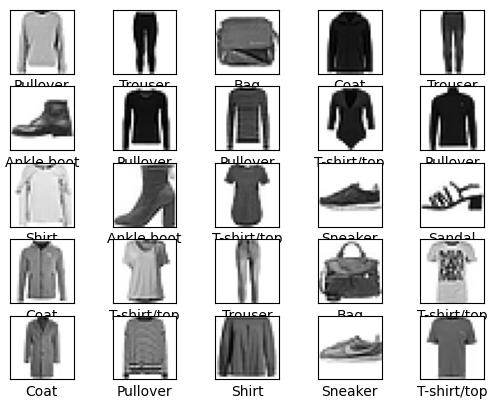

In [61]:
plt.figure()
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombre_clases[etiqueta])

In [62]:


modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 canal de color (escala de grises)
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 10 clases de salida
])

c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
modelo.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [64]:
numero_ejemplos_entrenamiento = metadatos.splits['train'].num_examples
numero_ejemplos_prueba = metadatos.splits['test'].num_examples

In [65]:
print(numero_ejemplos_entrenamiento
      , numero_ejemplos_prueba  )

60000 10000


In [66]:
tamano_lote = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numero_ejemplos_entrenamiento).batch(tamano_lote)
datos_prueba = datos_prueba.batch(tamano_lote)

In [67]:
historial = modelo.fit(datos_entrenamiento, epochs=10, steps_per_epoch=numero_ejemplos_entrenamiento//tamano_lote)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8188 - loss: 0.5215
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8620 - loss: 0.3846
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8711 - loss: 0.3521
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8803 - loss: 0.3263
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8847 - loss: 0.3108
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8893 - loss: 0.2982
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8926 - loss: 0.2899
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.2761
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8997 - loss: 0.2659
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9024 - loss: 0.2608


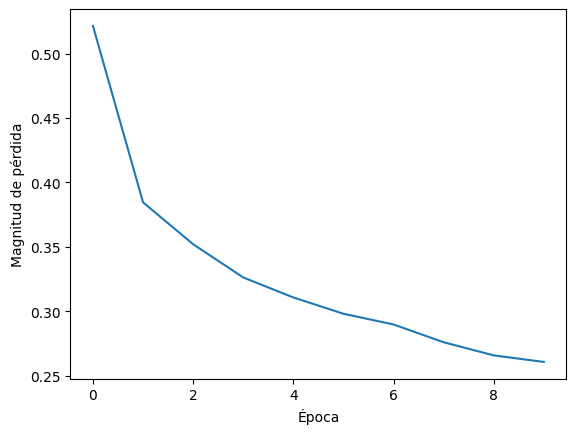

In [68]:
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

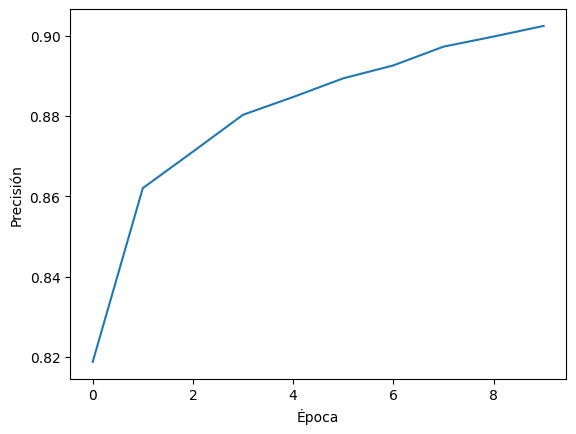

In [69]:
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


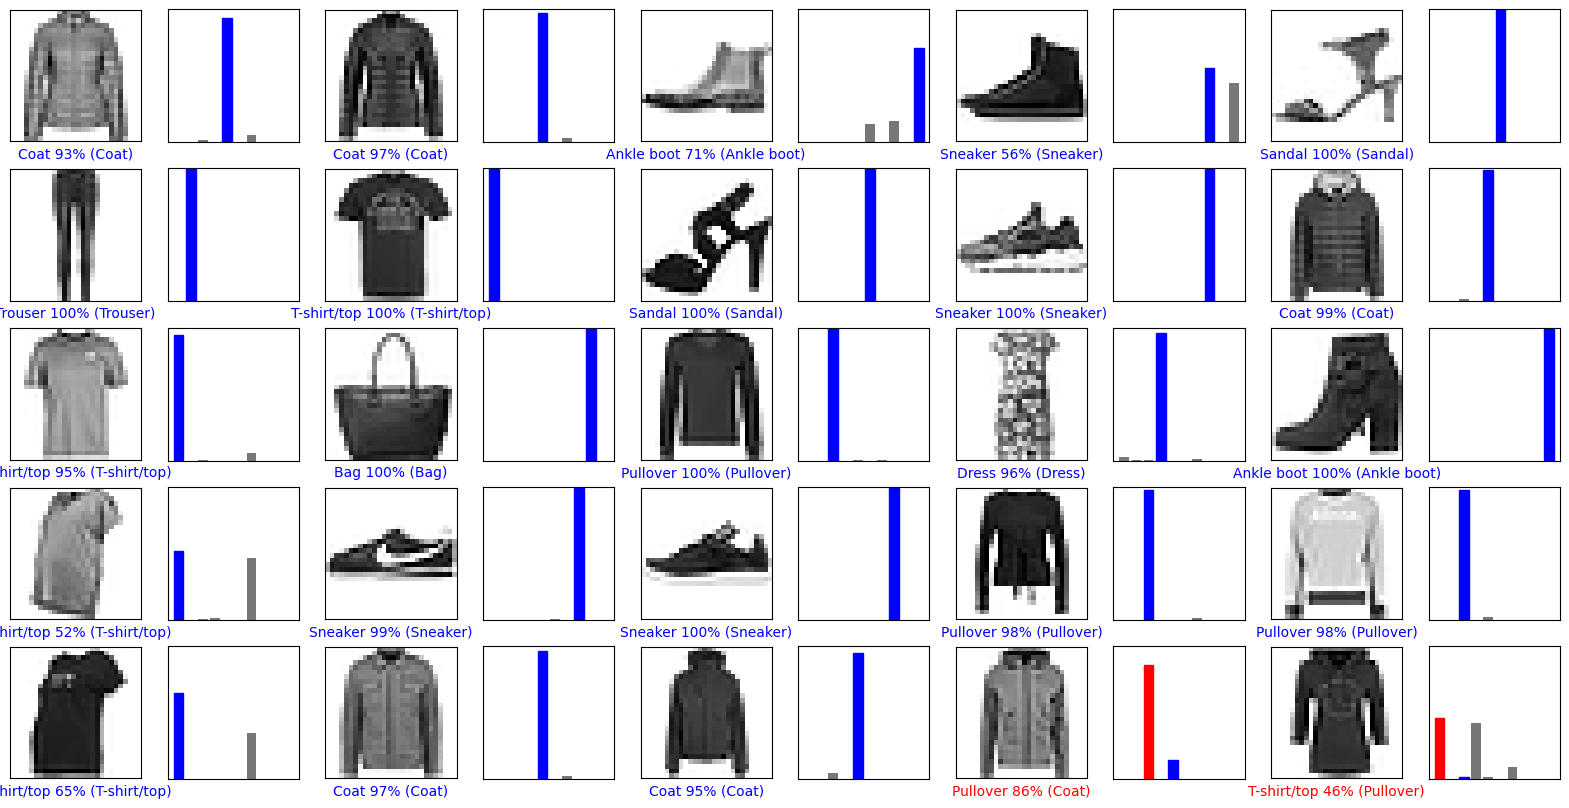

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Tomar un lote de imágenes de prueba para hacer predicciones
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

# Función para graficar la imagen con su etiqueta predicha
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue' # Predicción correcta
    else:
        color = 'red'  # Predicción incorrecta
  
    # CORRECCIÓN AQUÍ: Se cambió 'nombres_clases' por 'nombre_clases'
    plt.xlabel("{} {:2.0f}% ({})".format(nombre_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombre_clases[etiqueta_real]),
                                color=color)

# Función para graficar la barra de probabilidades
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0, 1]) 
    etiqueta_prediccion = np.argmax(arr_predicciones)
  
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

# Generar la cuadrícula de 5x5 imágenes
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))

for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.show()

In [ ]:
import numpy as np

# Tomamos la imagen en la posición 4 de ese lote que ya teníamos
imagen = imagenes_prueba[0] 

# IMPORTANTE: La red espera un lote de imágenes, no una sola.
# Por eso metemos la imagen dentro de otra lista/array para simular un lote de 1.
imagen_lote = np.array([imagen]) 

# Hacemos la predicción
prediccion = modelo.predict(imagen_lote)


print("Predicción: " + nombre_clases[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción: Coat
